<a href="https://colab.research.google.com/github/harshini-engg/ecommerce-sales-analysis/blob/main/Ecommerce_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import the file from content /online Retail.xlsx


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path = '/content/drive/MyDrive/Dataproject/Online Retail.xlsx'


Read the file

In [4]:
df = pd.read_excel(file_path)


In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


Data cleaning

In [7]:
df = df.dropna(subset=['CustomerID'])

In [8]:
df = df[df['Quantity']>0]

In [9]:
df['TotalPrice']=df['Quantity']*df['UnitPrice']

In [10]:
df['TotalPrice']

,TotalPrice
0,15.30
1,20.34
2,22.00
3,20.34
4,20.34
...,...
541904,10.20
541905,12.60
541906,16.60
541907,16.60


In [11]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [12]:
Total_revenue=df['TotalPrice'].sum()
print(f"Total Revenue: {Total_revenue:,.2f}")

Total Revenue: 8,911,407.90


Top products

In [13]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

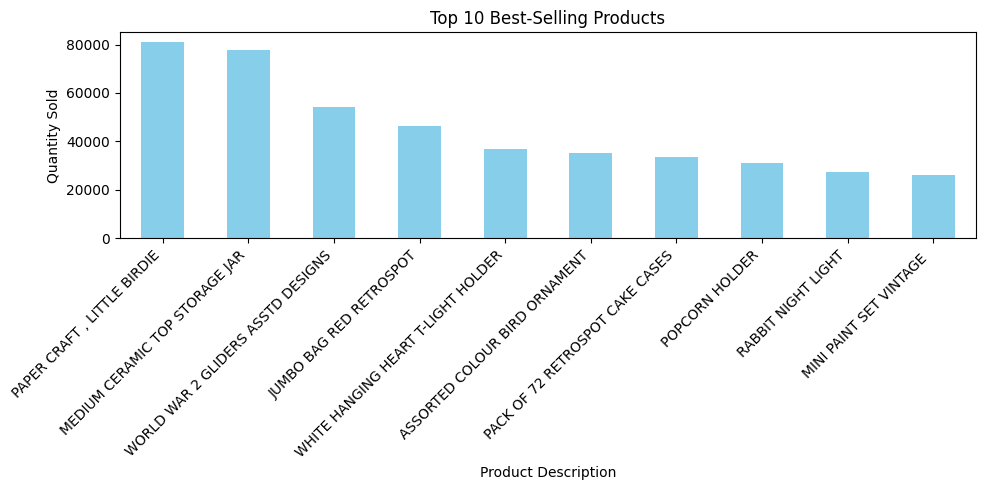

In [14]:
top_products.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product Description')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()

To 10 less sale productes

In [15]:
less_product=df.groupby('Description')['Quantity'].sum().sort_values(ascending=True).head(10)

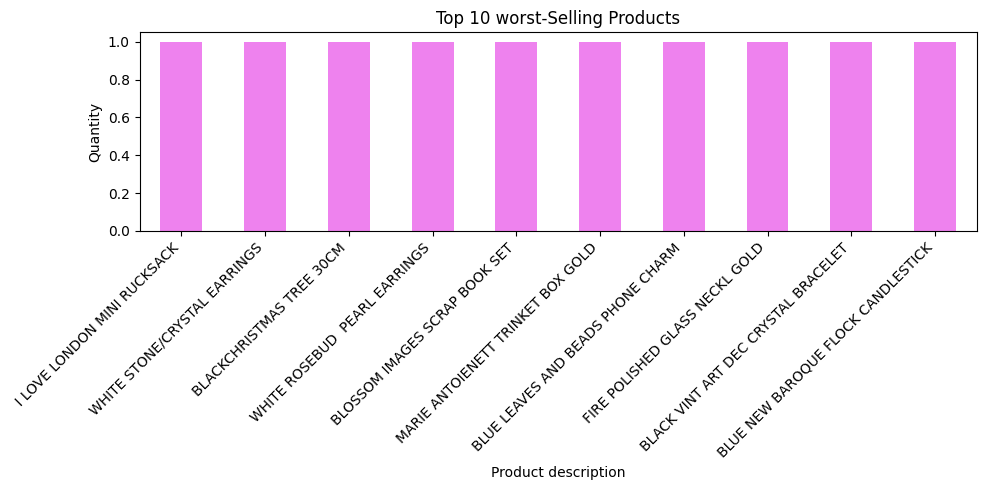

In [16]:
less_product.plot(kind='bar',figsize=(10,5),color='violet')
plt.title('Top 10 worst-Selling Products')
plt.xlabel('Product description')
plt.ylabel('Quantity')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

plt.show()

Top countries by reavnue


In [17]:
Top_countries=df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

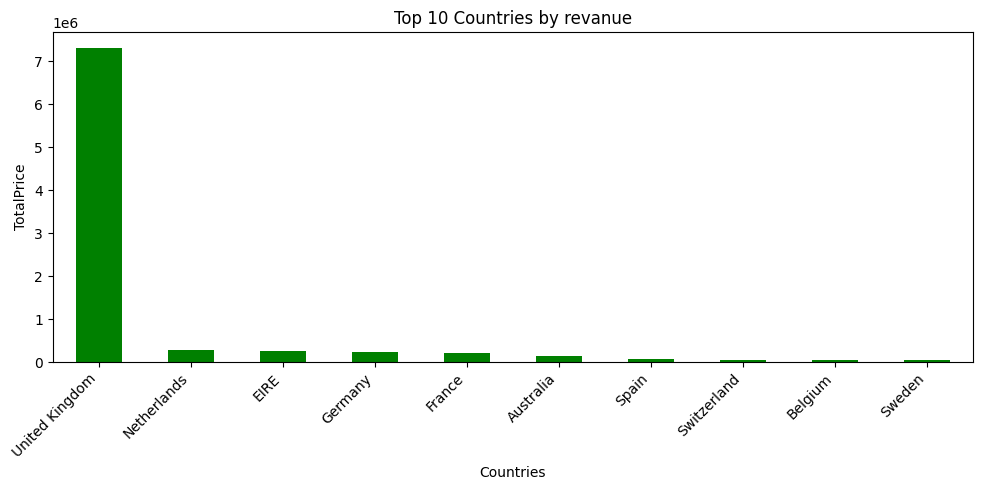

In [18]:
Top_countries.plot(kind='bar',figsize=(10,5),color='Green')

plt.title('Top 10 Countries by revanue')
plt.xlabel('Countries')
plt.ylabel('TotalPrice')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

plt.show()


Sales basded on the month

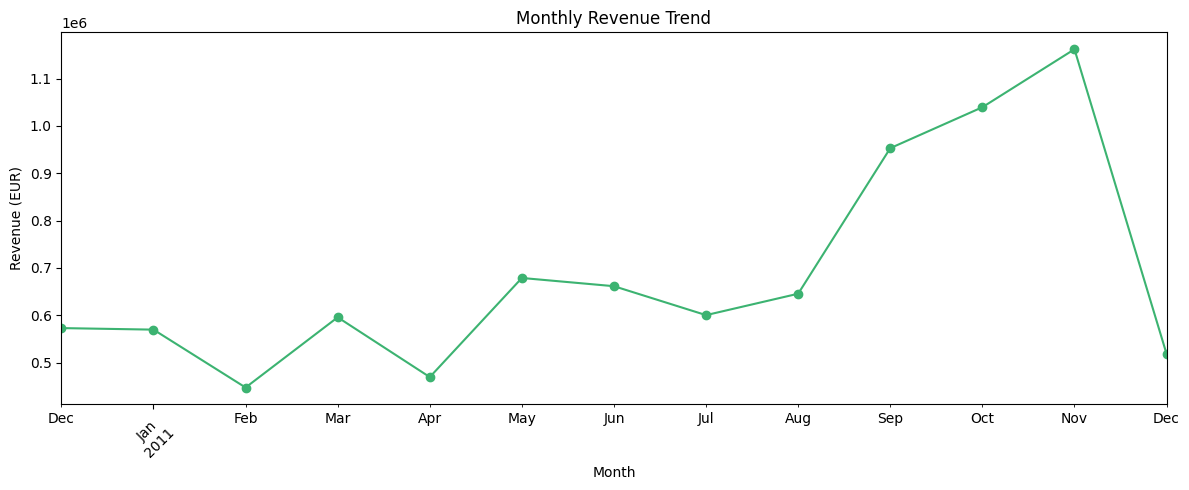

In [19]:

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


df['MonthYear'] = df['InvoiceDate'].dt.to_period('M')


monthly_revenue = df.groupby('MonthYear')['TotalPrice'].sum()


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
monthly_revenue.plot(kind='line', marker='o', color='mediumseagreen')
plt.title('Monthly Revenue Trend')
plt.ylabel('Revenue (EUR)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


RFM customer segmentation

In [22]:
latest_date=df['InvoiceDate'].max()
latest_date

Timestamp('2011-12-09 12:50:00')

In [38]:
rfm=df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x:(latest_date-x.max()).days,
    'InvoiceNo'  : 'nunique' ,
    'TotalPrice' : 'sum'

})

rfm

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,7,4310.00
12348.0,74,4,1797.24
12349.0,18,1,1757.55
12350.0,309,1,334.40
...,...,...,...
18280.0,277,1,180.60
18281.0,180,1,80.82
18282.0,7,2,178.05


In [39]:
rfm.columns=['Recency', 'Frequency', 'Monetary']
rfm.reset_index()
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,7,4310.00
12348.0,74,4,1797.24
12349.0,18,1,1757.55
12350.0,309,1,334.40


In [46]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], q=4, labels=[4, 3, 2, 1]).astype(int)

# 2. Frequency Score: higher is better (use rank to break ties)
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), q=4, labels=[1, 2, 3, 4]).astype(int)

# 3. Monetary Score: higher is better
rfm['M_Score'] = pd.qcut(rfm['Monetary'], q=4, labels=[1, 2, 3, 4]).astype(int)

# 4. Combine scores into RFM_Score string
rfm['RFM_Score'] = (
    rfm['R_Score'].astype(str) +
    rfm['F_Score'].astype(str) +
    rfm['M_Score'].astype(str)
)

# 5. Preview the results
rfm.head()


,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
CustomerID,,,,,,,
12346.0,325,1,77183.60,1,1,4,114
12347.0,1,7,4310.00,4,4,4,444
12348.0,74,4,1797.24,2,3,4,234
12349.0,18,1,1757.55,3,1,4,314
12350.0,309,1,334.40,1,1,2,112


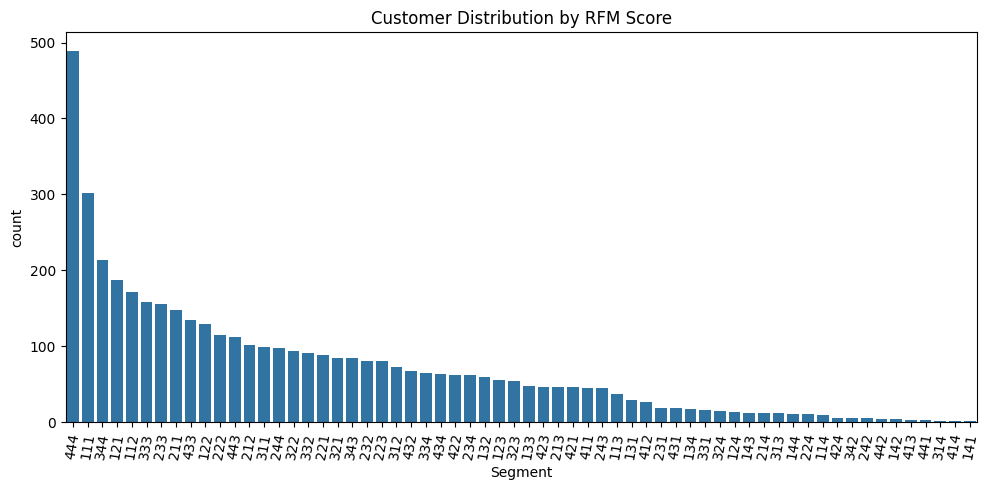

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

rfm['Segment'] = rfm['RFM_Score']

# Plot
plt.figure(figsize=(10, 5))
sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index)
plt.title('Customer Distribution by RFM Score')
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()